## AirBnB Assignment Part II

In [1]:
##Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

<hr style="border-radius: 50%; background-color: orange;height: 2px;">

In [162]:
# Helper function to save the seaborn figure.
def savefig(sns_obj, figure_name):
    """
    Saves figure from the sns object.

    Args
    -----
    sns_obj: The seaborn plot object.
    figure_name: The name you want to save your image with.
    """
    fig = sns_obj.get_figure()
    fig.savefig(figure_name, bbox_inches="tight")

In [40]:
# Setting up theme colors.
airbnb_red = "#FF5A5F"
airbnb_blue = "#00A699"
airbnb_orange = "#FC642D"
airbnb_hof = "#484848"
airbnb_foggy = "#767676"

theme_colors = [
    airbnb_red,
    airbnb_blue,
    airbnb_orange,
    airbnb_hof,
    airbnb_foggy,
]

In [41]:
#Load the dataset
df = pd.read_csv('airbnblistings.csv')

In [42]:
#check the top 5 rows
df.head(n=5)

,id,name,host_id,host_name,host_since_Year,neighbourhood,latitude,longitude,room_type,price,...,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,accommodates,bedrooms
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,2008,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,49,...,2022-06-01,4.89,4.93,5.00,4.97,4.98,4.69,4.82,2,1.0
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,2009,Centrum-Oost,52.36407,4.89393,Private room,106,...,2020-04-09,4.44,4.69,4.79,4.63,4.62,4.87,4.49,2,1.0
2,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,2010,Centrum-West,52.38761,4.89188,Private room,126,...,2022-04-24,4.94,4.92,4.95,4.95,4.92,4.89,4.79,2,1.0
3,28871,Comfortable double room,124245,Edwin,2010,Centrum-West,52.36775,4.89092,Private room,75,...,2022-06-04,4.88,4.95,4.90,4.96,4.94,4.97,4.83,2,1.0
4,29051,Comfortable single room,124245,Edwin,2010,Centrum-Oost,52.36584,4.89111,Private room,55,...,2022-06-02,4.79,4.88,4.84,4.92,4.91,4.87,4.76,1,1.0


<hr style="border-radius: 50%; background-color: orange;height: 2px;">

## Task 1 
Basic Descriptive Statistics 
### 1.1 How many AirBnB listings are there in the city of Amsterdam?

In [43]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'host_since_Year',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'accommodates', 'bedrooms'],
      dtype='object')

In [44]:
##Write your code here
# The number of listings can be achieved by 2 ways.

# 1. using the shape which returns number of rows and columns.
df.shape[0]

# 2. Using the describe function and selecting the count index.
df['id'].describe().loc['count']

6173.0

**Answer**: There are **6173** listings in the city of Amsterdam.

<hr style="border-radius: 50%; background-color: red;height: 1px">

### 1.2 What is the average price of all the AirBnB listings in Amsterdam?

In [45]:
##Write your code here
avg_price = df['price'].describe().loc['mean']

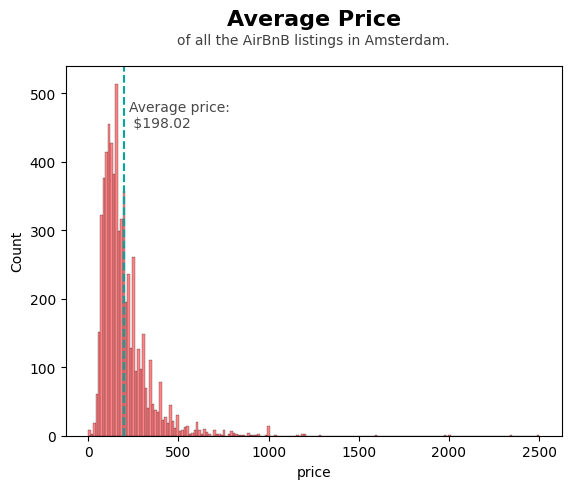

In [46]:
ax = sns.histplot(data=df['price'], color=theme_colors[0])

ax.text(x=0.5, y=1.1, s='Average Price', fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.05, s='of all the AirBnB listings in Amsterdam.', fontsize=10, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)

## Creating a dashed mean line to show the Average price of listings.
ax.axvline(avg_price, linestyle='dashed', color=theme_colors[1])

## Adding text beside the Mean Line for readability.
ax.text(x=avg_price+30, y=450, s=f"Average price: \n ${avg_price:.2f}", color=theme_colors[3])
plt.show()
savefig(ax, 'average-price')

In [9]:
print(f"{avg_price:.2f} is the average price of all the AirBnB listings in Amsterdam.")

198.02 is the average price of all the AirBnB listings in Amsterdam.


<hr style="border-radius: 50%; background-color: red;height: 1px">

### 1.3 - What is the average rating received by all the AirBnB listings in Amsterdam? *Hint* - Use the `review_scores_rating` column for answering this question

In [10]:
##Write your code here
average_rating = df['review_scores_rating'].describe().loc['mean']

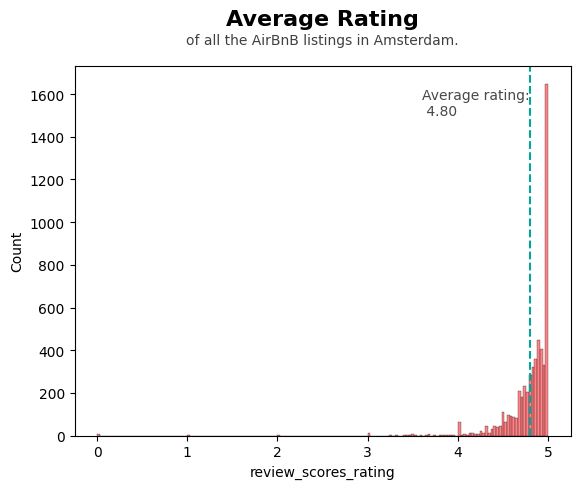

In [47]:
ax = sns.histplot(data=df['review_scores_rating'], color=theme_colors[0])

## Headings 
ax.text(x=0.5, y=1.1, s='Average Rating', fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.05, s='of all the AirBnB listings in Amsterdam.', fontsize=10, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)

## Creating a dashed mean line to show the Average Rating of listings.
ax.axvline(average_rating, linestyle='dashed', color=theme_colors[1])

## Adding text beside the Mean Line for readability.
ax.text(x=average_rating-1.2, y=1500, s=f"Average rating: \n {average_rating:.2f}", color=theme_colors[3])
plt.show()
savefig(ax, 'average-rating')

In [12]:
print(f"{average_rating:.2f} is the average rating of all the AirBnB listings in Amsterdam.")

4.80 is the average rating of all the AirBnB listings in Amsterdam.


<hr style="border-radius: 50%; background-color: orange;height: 2px;">

## Task 2

### Plot a histogram for the following variables and observe their distribution. Choose the parameters like bin width, number of bins, etc. as per your choice.

- `price`
- `number_of_reviews`
- `review_scores_rating`

In [48]:
def add_bar_labels(ax, fontsize: int = 8, padding: int = 3):
    """
    Helper function to add labels on top of the bar.

    Args
    ------
    ax: Rectangle
    The object returned by histplot or barplot.
    """

    for c in ax.containers:
        labels = [
            f'{v.get_height():0.2f}' for v in c
        ]

        ax.bar_label(c, labels=labels, fontsize=fontsize, padding=padding)

<hr style="border-radius: 50%; background-color: red;height: 1px">

### 2.1: Plotting Distribution of Price.

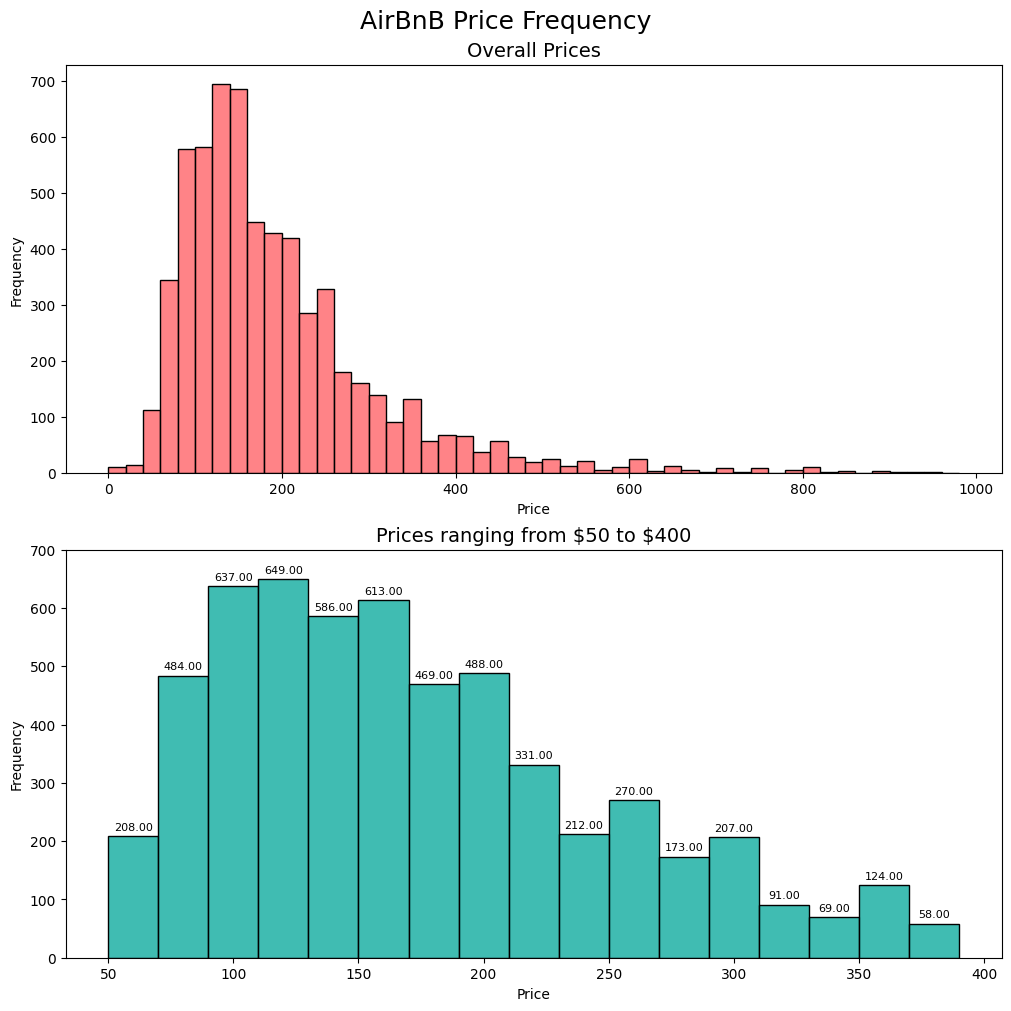

In [179]:
##Write your code here for plotting the distribution of price
fig, axes = plt.subplots(2, 1, figsize=(10, 10), layout='constrained')
fig.suptitle("AirBnB Price Frequency", fontsize=18)

# First Histogram Showing Full Distribution of prices.
hist_plot_1 = sns.histplot(data=df, x='price', bins=range(0, 1000, 20), ax=axes[0], color=theme_colors[0])
hist_plot_1.set_title("Overall Prices", fontsize=14)
hist_plot_1.set_xlabel("Price")
hist_plot_1.set_ylabel("Frequency")

# Second Histogram showing the range with higher frequency.
hist_plot_2 = sns.histplot(data=df, x='price', bins=range(50, 400, 20), ax=axes[1], color=theme_colors[1])
hist_plot_2.set_ylim(0, 700)
hist_plot_2.set_title("Prices ranging from \$50 to \$400", fontsize=14)
hist_plot_2.set_xlabel("Price")
hist_plot_2.set_ylabel("Frequency")

add_bar_labels(hist_plot_2)
fig.savefig('pricing-distribution', bbox_inches="tight")
plt.show()

### Observations
1. The minimum price starts from  \\$25 and Max price is around \$950.
2. \\$100 to \$150 is the price range with the highest frequency.
3. The frequency starts dropping as we go to the right from \$400 mark.

<hr style="border-radius: 50%; background-color: red;height: 1px">

### 2.2: Plotting Distribution of Reviews.

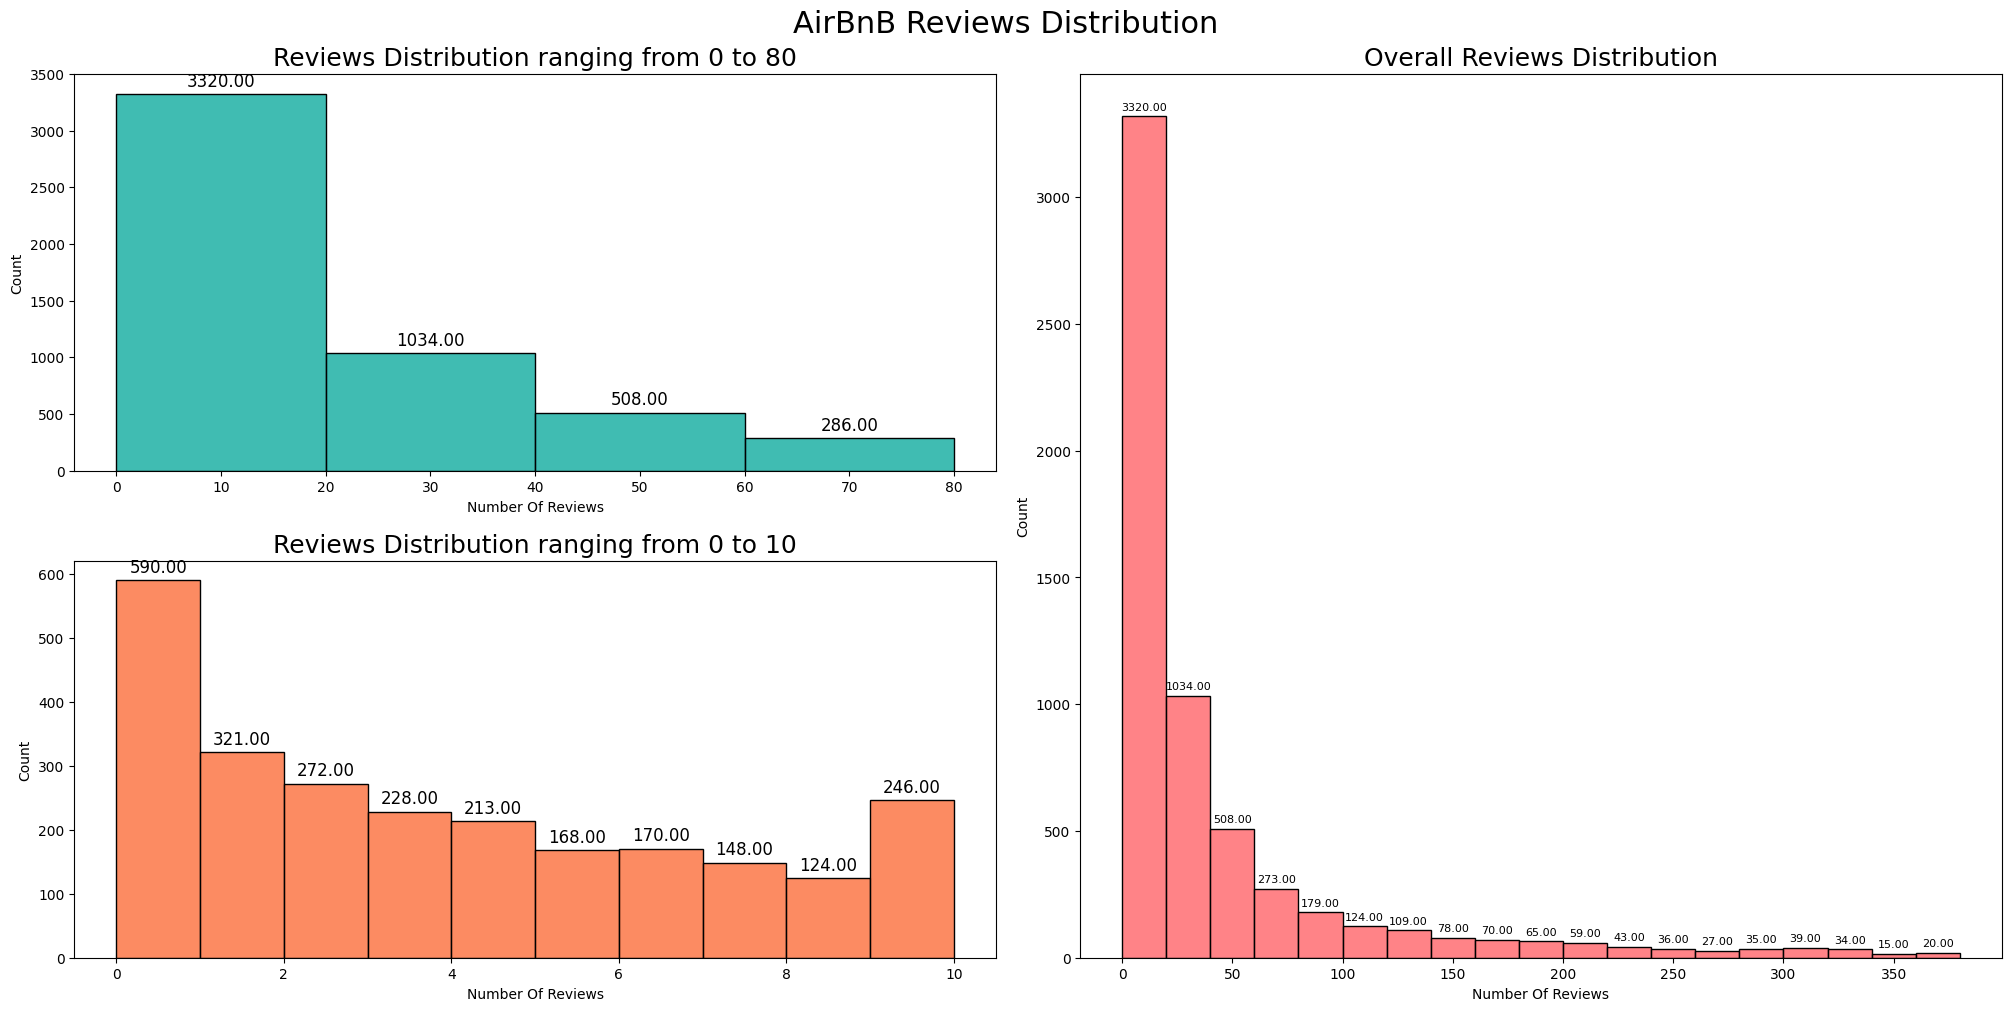

In [50]:
##Write your code here for plotting the distribution of reviews

fig = plt.figure(layout='constrained', figsize=(20, 10))


fig.suptitle("AirBnB Reviews Distribution", fontsize=22)

# Creating Subplots layout.
ax1 = fig.add_subplot(plt.subplot(2, 2, (2, 4)))
ax2 = fig.add_subplot(plt.subplot(2, 2, 1))
ax3 = fig.add_subplot(plt.subplot(2, 2, 3))

## Plotting the Overall Revievs Distribution
ax1.set_title("Overall Reviews Distribution", fontsize=18)
histplot_1 = sns.histplot(data=df, x='number_of_reviews', color=theme_colors[0], bins=range(0, 400, 20), ax=ax1)
histplot_1.set_xlabel('Number Of Reviews')

## Plotting the Revievs Distribution from range 0 to 80.

### The range had higher frequency in OVerall.
### Lets zoom in and find out what does the range look like.
ax2.set_title("Reviews Distribution ranging from 0 to 80", fontsize=18)
histplot_2 = sns.histplot(data=df, x='number_of_reviews', color=theme_colors[1], bins=range(0, 100, 20), ax=ax2)
histplot_2.set_ylim(0, 3500)
histplot_2.set_xlabel('Number Of Reviews')

## Plotting the Revievs Distribution from range 0 to 10.
### Lets zoom in and find out what does the range look like.
ax3.set_title("Reviews Distribution ranging from 0 to 10", fontsize=18)
histplot_3 = sns.histplot(data=df, x='number_of_reviews', color=theme_colors[2], bins=range(0, 11, 1), ax=ax3)
# histplot_3.set_ylim(0, 3500)
histplot_3.set_xlabel('Number Of Reviews')

add_bar_labels(histplot_1, fontsize=8)
add_bar_labels(histplot_2, fontsize=12)
add_bar_labels(histplot_3, fontsize=12)

plt.show()

### Observations

1. The distribution is Right skewed.
2. Most Number of Reviews range from __0 to 20__ total of ___3320.00___.
3. ___0 to 1___ reviews are given most number of times with total of ___590.00___.
4. We see a rise in reviews after 8.

<hr style="border-radius: 50%; background-color: red;height: 1px">

### 2.2: Plotting Distribution of Ratings.

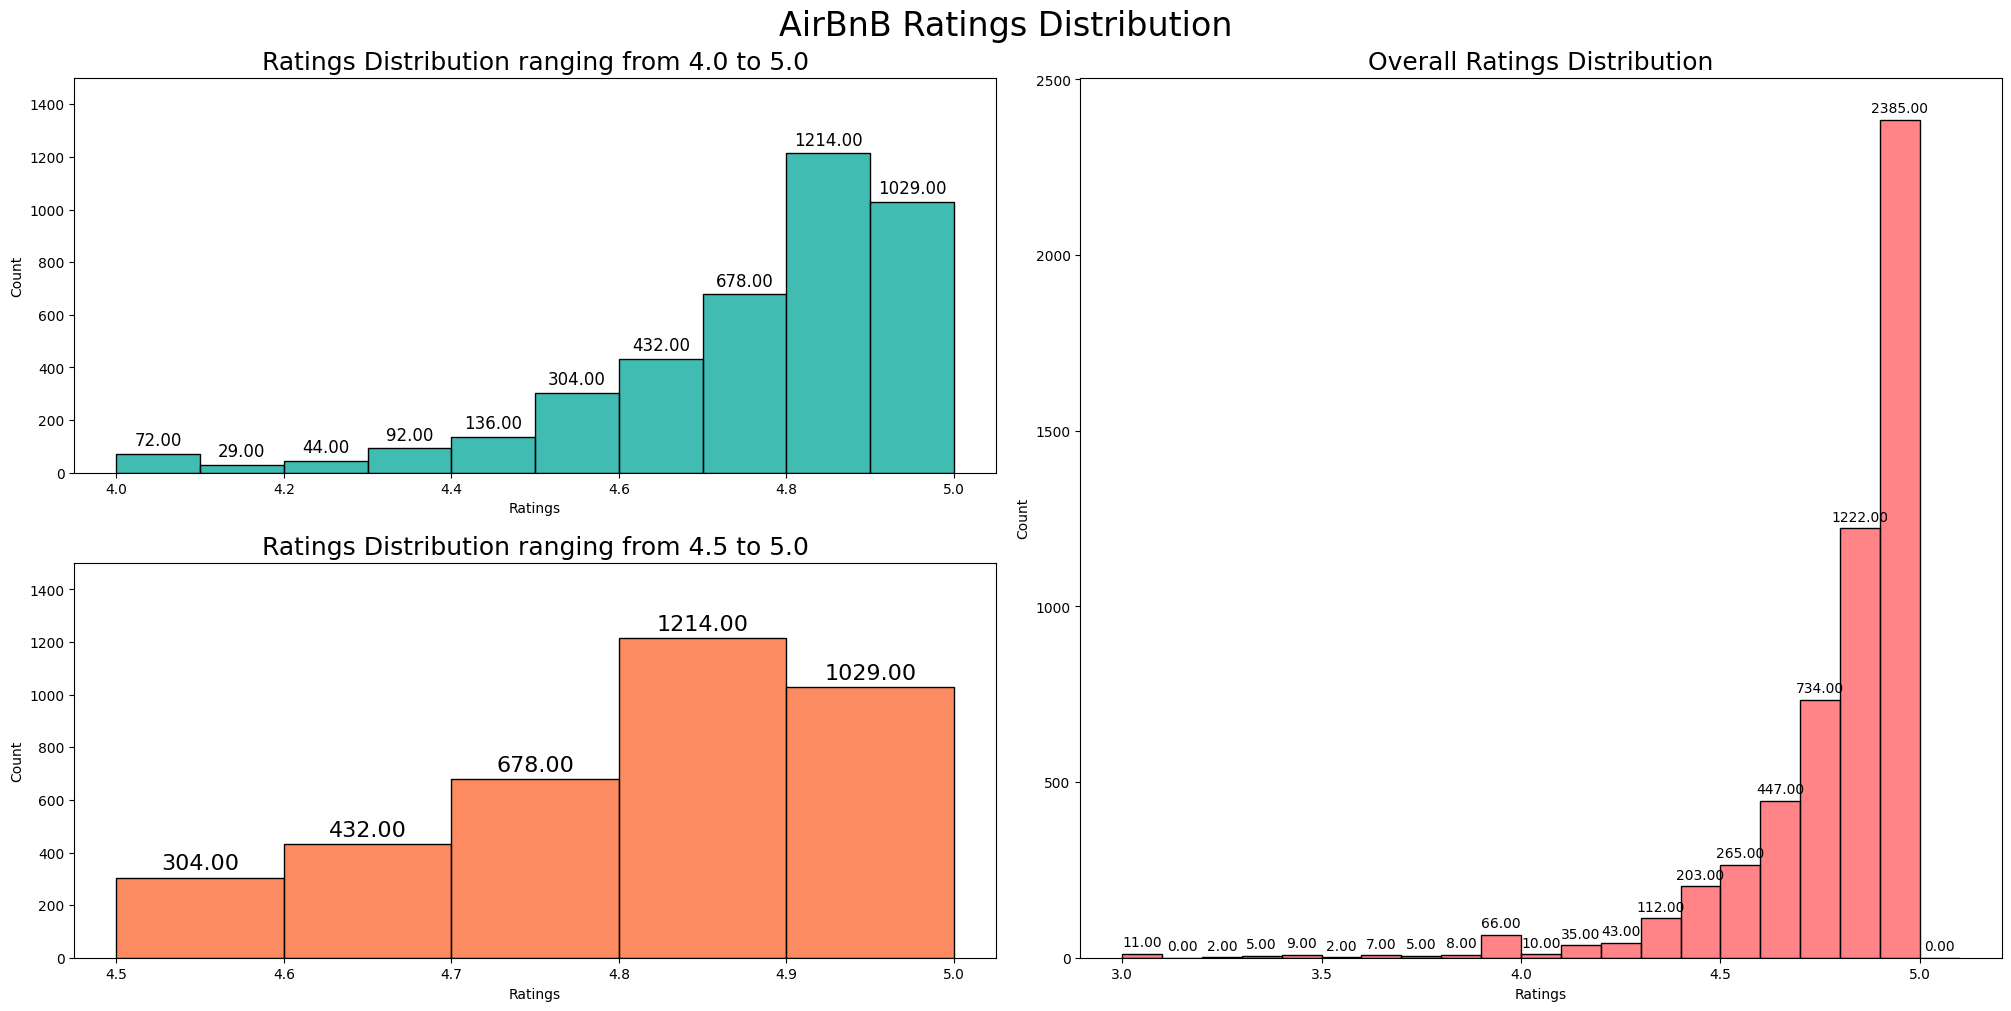

In [51]:
##Write your code here for plotting the distribution of ratings
fig = plt.figure(layout='constrained', figsize=(20, 10))
# fig.suptitle("AirBnB Ratings Distribution", fontsize=18)
ax1 = fig.add_subplot(plt.subplot(2, 2, (2, 4)))
ax2 = fig.add_subplot(plt.subplot(2, 2, 1))
ax3 = fig.add_subplot(plt.subplot(2, 2, 3))

fig.suptitle("AirBnB Ratings Distribution", fontsize=24)

## Plotting the Overall Ratings Distribution
ax1.set_title("Overall Ratings Distribution", fontsize=18)
histplot_1 = sns.histplot(data=df, x='review_scores_rating', color=theme_colors[0], bins=np.arange(3, 5.2, 0.1), ax=ax1)
histplot_1.set_xlabel('Ratings')

## Plotting the Revievs Distribution from range 4.0 to 5.0.

### The range had higher frequency in OVerall.
### Lets zoom in and find out what does the range look like.
ax2.set_title("Ratings Distribution ranging from 4.0 to 5.0", fontsize=18)
histplot_2 = sns.histplot(data=df, x='review_scores_rating', color=theme_colors[1], bins=np.arange(4, 5.1, 0.1), ax=ax2)
histplot_2.set_ylim(0, 1500)
histplot_2.set_xlabel('Ratings')

## Plotting the Revievs Distribution from range 4.5 to 5.0.

### The range had higher frequency.
### Lets zoom in and find out what does the range look like.
ax3.set_title("Ratings Distribution ranging from 4.5 to 5.0", fontsize=18)
histplot_3 = sns.histplot(data=df, x='review_scores_rating', color=theme_colors[2], bins=np.arange(4.5, 5.1, 0.1), ax=ax3)
histplot_3.set_ylim(0, 1500)
histplot_3.set_xlabel('Ratings')

add_bar_labels(histplot_1, fontsize=10)
add_bar_labels(histplot_2, fontsize=12)
add_bar_labels(histplot_3, fontsize=16)

plt.show()

### Observations:

1. The ratings range from ___3.0 to 5.0___
2. Count of the ratings starts increasing from the 4.0 mark.
3. Most of the ratings given are ___4.8 to 5.0___ with total Count of ___2,243___.
4. Ratings see a dip between 4.0 to 4.4
5. __4.8__ to ___4.9___ have the Highest Count of Ratings with the total of ___1,214.00___ ratings.

<hr style="border-radius: 50%; background-color: orange;height: 2px;">

## Task 3

### Plot a visualization to show the number of listings for each `room_type`

Which `room_type` has the highest number of listings?

<hr style="border-radius: 50%; background-color: red;height: 1px">

### 3.1: Preparing the Data for visualization. 

#### Getting the Value counts for every `room_type`

In [16]:
counts_room_type_df = pd.DataFrame(df['room_type'].value_counts()).reset_index()

# Getting the labels for X axis.
labels = df['room_type'].unique().tolist()

#### Getting the Value counts for every `room_type` Over the years.
Using the `host_since_Year` column to get count of `room_type` every year.

In [17]:
## Grouping by years and extracting the value counts of room_type.
yearly_room_type_counts_df = pd.DataFrame(df.groupby('host_since_Year')['room_type'].value_counts())

## The DF had Multiple Index. Changed to multiple index to columns.
yearly_room_type_counts_df = yearly_room_type_counts_df.reset_index()

<hr style="border-radius: 50%; background-color: red;height: 1px">

### 3.2: Visualizing The Data.

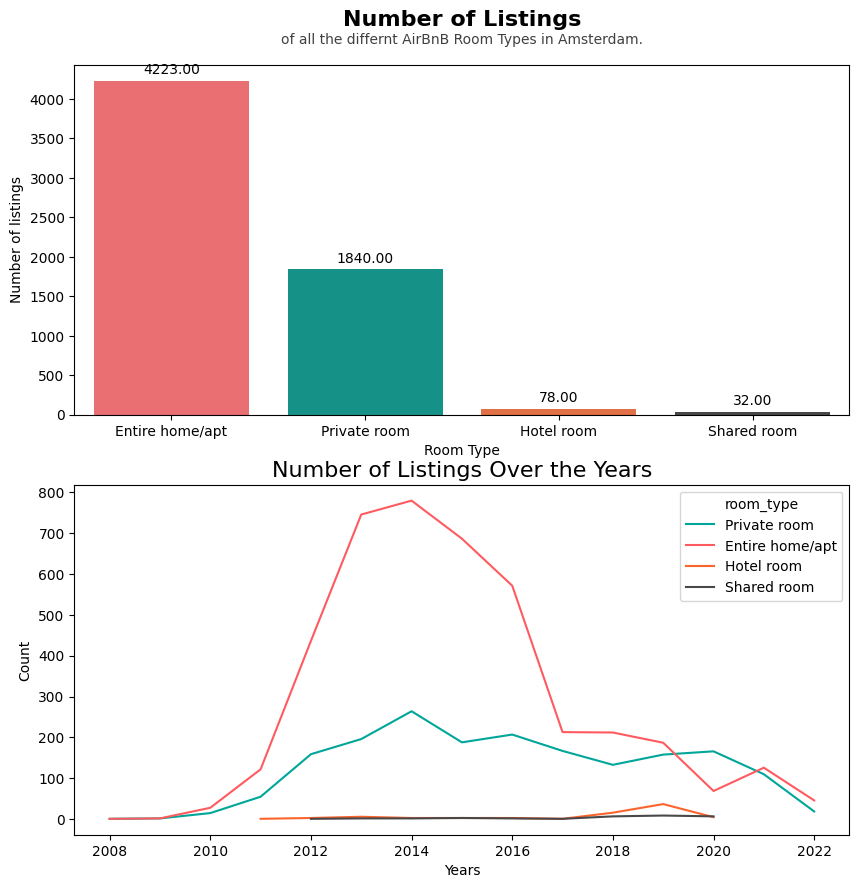

In [52]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

## Bar plot ##
bar_plot = sns.barplot(data=df, x=df['room_type'].value_counts().index, y=df['room_type'].value_counts(), ax=axes[0], palette=theme_colors)

## Headings 
bar_plot.text(x=0.5, y=1.1, s='Number of Listings', fontsize=16, weight='bold', ha='center', va='bottom', transform=bar_plot.transAxes)
bar_plot.text(x=0.5, y=1.05, s='of all the differnt AirBnB Room Types in Amsterdam.', fontsize=10, alpha=0.75, ha='center', va='bottom', transform=bar_plot.transAxes)

bar_plot.set_ylabel('Number of listings')
bar_plot.set_xlabel('Room Type')
add_bar_labels(bar_plot, fontsize=10)


## Line PLot ##
line_plot = sns.lineplot(data=yearly_room_type_counts_df, x='host_since_Year', y='count', hue='room_type', ax=axes[1], palette=[theme_colors[1], theme_colors[0], theme_colors[2], theme_colors[3]])

## Headings
line_plot.set_title("Number of Listings Over the Years", color="black", fontsize=16)

line_plot.set_xlabel("Years")
line_plot.set_ylabel("Count")

plt.show()
fig.savefig('listings-bar-and-line')

#### Observations

1. ___Entire Home/apt___ has highest number of listings with total of ___4223.00___.
2. ___Shared room___ has lowest number of listings with total of ___32.00___.
3. ___Hotel Rooms___ were not listed till 2011.
4. ___Shared room___ were not listed till 2012.
5. ___Shared room___ and ___Hotel Rooms___ were not listed after 2020.
6. ___Entire Home/apt___ peaked in year 2014.

<hr style="border-radius: 50%; background-color: orange;height: 2px;">

## Task 4

You want to observe the relationship between the reviews(given by `number_of_reviews`) and the ratings received (`review_scores_rating`) by different AirBnB listings.

For this, plot both a scatterplot and a jointplot. What can you say about the relationship between ratings and reviews?

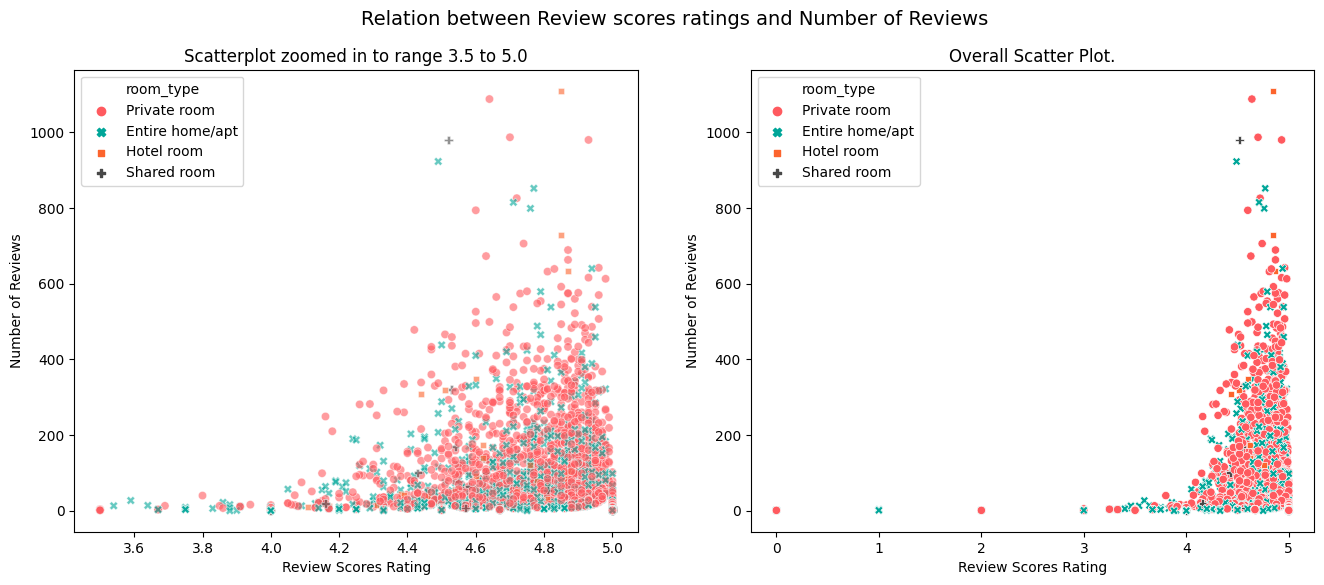

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

fig.suptitle("Relation between Review scores ratings and Number of Reviews", fontsize=14)

## Scatterplot zoomed in to range 3.5 to 5.0

ranged_df = df[(df['review_scores_rating'] >= 3.5) | (df['review_scores_rating'] >= 5.0)]

s2 = sns.scatterplot(data=ranged_df, x='review_scores_rating', y='number_of_reviews', hue="room_type", style="room_type", ax=axes[0],alpha=0.6, palette=[theme_colors[0], theme_colors[1], theme_colors[2], theme_colors[3]])
s2.set_title("Scatterplot zoomed in to range 3.5 to 5.0", fontsize=12)
s2.set_xlabel("Review Scores Rating")
s2.set_ylabel("Number of Reviews")

## OVerall Reviews Scatterplot.
s1 = sns.scatterplot(data=df, x='review_scores_rating', y='number_of_reviews', hue="room_type", style="room_type", ax=axes[1], palette=[theme_colors[0], theme_colors[1], theme_colors[2], theme_colors[3]])
s1.set_title("Overall Scatter Plot.", fontsize=12)
s1.set_xlabel("Review Scores Rating")
s1.set_ylabel("Number of Reviews")
plt.show()

<hr style="border-radius: 50%; background-color: red;height: 1px">

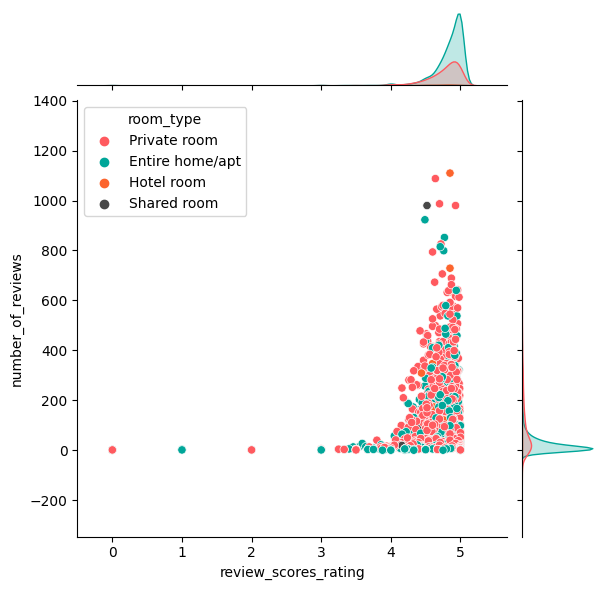

In [27]:
##Write your code here for jointplot
sns.jointplot(data=df, x='review_scores_rating', y='number_of_reviews', hue='room_type', palette=[theme_colors[0], theme_colors[1], theme_colors[2], theme_colors[3]])
plt.show()

### Obersvations:

1. Most of the review scores rating are in range 4 to 5.
2. 0 to 400 reviews have most number of reviews scores ranging from 4 to 5.

<hr style="border-radius: 50%; background-color: orange;height: 2px;">

## Task 5

 AirBnB has been adding quite a few listings in the city of Amseterdam since they started operating in 2008. Plot a lineplot to observe how the average `review_scores_rating` has changed across the different years (use `host_since_Year` column) AirBnB has been operating in the city.

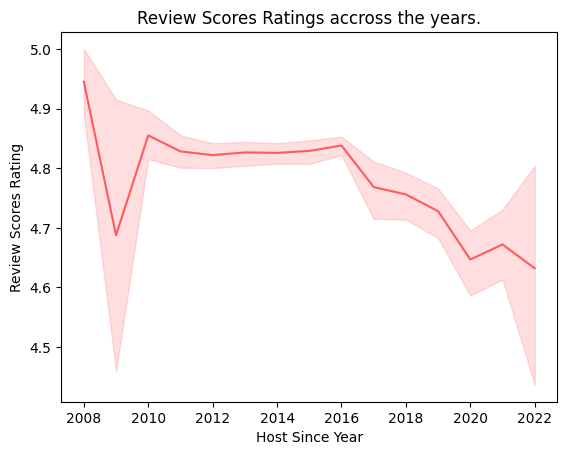

In [137]:
### Write your code for lineplot here
ax = sns.lineplot(data=df, x='host_since_Year', y='review_scores_rating', color=theme_colors[0])
ax.set_title("Review Scores Ratings accross the years.", fontsize=12)
ax.set_xlabel('Host Since Year')
ax.set_ylabel('Review Scores Rating')
plt.show()
savefig(ax, 'ratings-across-years')

### Observations:

1. Review Scores took a downward trend between 2008 and 2009.
2. Review Scores took a upward trend between 2009 and 2010.
3. Review Scores hit a plateau with a slight rise between 2012 and 2016
4. From 2016 Downward trend started which lasted till 2020.
5. 2020-2021 saw a rise but 2021-2023 saw downward trend.

<hr style="border-radius: 50%; background-color: orange;height: 2px;">

## Task 6

You wish to identify the relationship between the various ratings each of the listing has received from the customers.
These ratings have been summarized below:

In [30]:
review_columns = ['review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value']

Plot a heatmap of the correlation matrix of the above ratings variables and document your observations. You can use this link to understand these variables further - https://www.airbnb.co.in/help/article/1257/star-ratings

<hr style="border-radius: 50%; background-color: red;height: 1px">

### 6.1: Preparing the data for visualization.

In [31]:
## Creating the Correlation Matrix.
review_corr_matrix = df[review_columns].corr()

<hr style="border-radius: 50%; background-color: red;height: 1px">

### 6.2: Visualizing the Correlation Matrix.

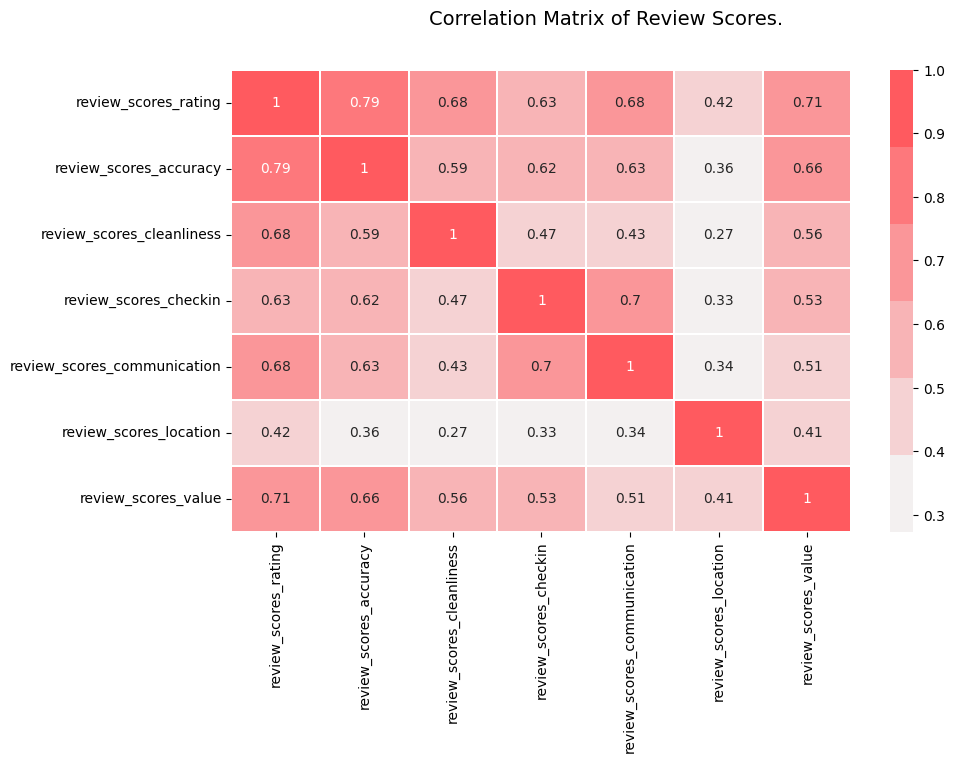

In [136]:
fig, ax = plt.subplots(figsize=(10, 6))
fig.suptitle("Correlation Matrix of Review Scores.", fontsize=14)
heat_map = sns.heatmap(data=review_corr_matrix, cmap=sns.light_palette(theme_colors[0]), annot=True, linewidths=0.25)
fig.savefig('review_scores_correlation', bbox_inches="tight")
plt.show()


### Observation

1. Review Scores Rating and Review Scores Value are related.
2. Review Scores Location doesn't have much relation with Review Scores Rating.
3. Review Scores Cleanliness Is Highly related to review scores rating (More the Cleaniness, more the rating).
4. Communication is also key factor in getting good ratings.

<hr style="border-radius: 50%; background-color: orange;height: 2px;">

## Task 7 

Analyze the listings' prices across the following neighborhoods using a categorical boxplot
- 'Westerpark', 'Oud-Noord', 'Noord-West','Zuid'

In [102]:
nc = ['Westerpark', 'Oud-Noord', 'Noord-West','Zuid']

<hr style="border-radius: 50%; background-color: red;height: 1px">

### 7.1: Preparing the data for visualization.

In [166]:
### Write your code for subsetting the data for only the above neighborhoods here
nc_df = df[df['neighbourhood'].apply(lambda x: x in nc)]

<hr style="border-radius: 50%; background-color: red;height: 1px">

### 7.2: Visualizing the Data.

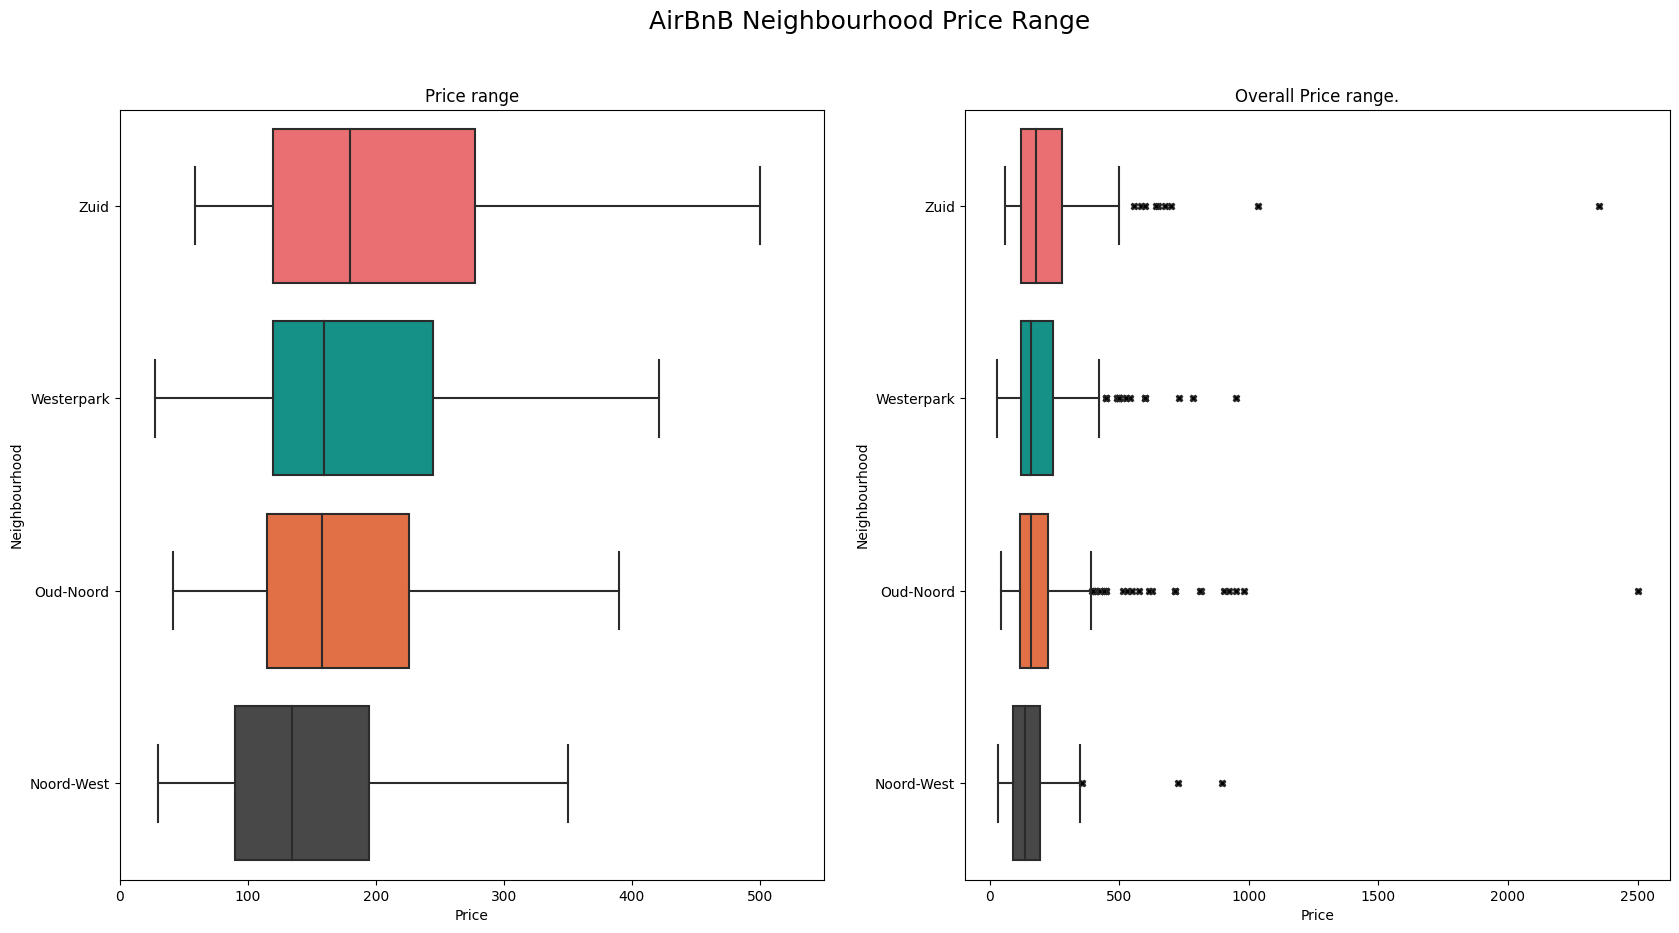

In [220]:
### Write your code for plotting the categorical boxplot here

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle("AirBnB Neighbourhood Price Range", fontsize=18)

box_plot1 = sns.boxplot(data=nc_df, x="price", y="neighbourhood", showfliers=False, ax=ax[0], palette=theme_colors)
box_plot1.set_title("Price range")
box_plot1.set_xlim(0, 550)
box_plot1.set_xlabel("Price")
box_plot1.set_ylabel("Neighbourhood")


box_plot2 = sns.boxplot(data=nc_df, x='price', y='neighbourhood', flierprops={"marker": 'X', "markerfacecolor": "black"}, ax=ax[1], palette=theme_colors)
box_plot2.set_title("Overall Price range.")
box_plot2.set_xlabel("Price")
box_plot2.set_ylabel("Neighbourhood")

plt.show()
savefig(box_plot1, 'box-plot-price-range')

### Observation:

1. Oud-Noord has most number of outliers in range 450 to 100.
2. Zuid has highest median in price.
3. Zuid has highest price of 500$
4. Wester park and Noord-West have joint lowest price.
5. Medians range from 100\$ to 200\\$.

<hr style="border-radius: 50%; background-color: orange;height: 2px;">

In [181]:
nbrhd_grpd_df = df.groupby('neighbourhood')

In [199]:
nbrhd_price_grpd_df = nbrhd_grpd_df['price'].describe().reset_index()

In [231]:
costliest_price_df = nbrhd_price_grpd_df.sort_values(by=['max'], ascending=False).head(n=5)

In [259]:
cheap_price_df = nbrhd_price_grpd_df.sort_values(by=['max'], ascending=True).head(n=4)

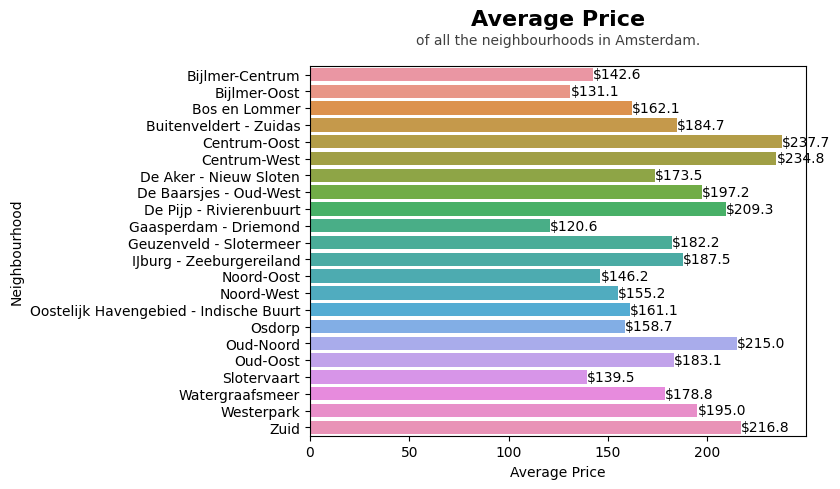

In [260]:
ax = sns.barplot(data=nbrhd_price_grpd_df, x='mean', y='neighbourhood')
ax.text(x=0.5, y=1.1, s='Average Price', fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.05, s='of all the neighbourhoods in Amsterdam.', fontsize=10, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)
ax.set_xlabel('Average Price')
ax.set_ylabel('Neighbourhood')
for bar in ax.containers:
    ax.bar_label(bar, fmt='$%.1f')
plt.show()
savefig(ax, 'avg-price-nbrhd')

In [265]:
costliest_price_df

,neighbourhood,count,mean,std,min,25%,50%,75%,max
16,Oud-Noord,254.0,215.015748,216.841447,42.0,115.25,158.0,226.0,2500.0
21,Zuid,376.0,216.789894,165.516552,59.0,120.00,180.0,277.5,2350.0
5,Centrum-West,838.0,234.757757,176.592951,0.0,137.00,190.0,275.0,2000.0
4,Centrum-Oost,602.0,237.730897,176.150142,0.0,133.25,189.5,288.5,1290.0
3,Buitenveldert - Zuidas,123.0,184.674797,110.931488,0.0,125.00,161.0,236.5,1000.0
